# Experimental results

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn.metrics as metrics
import tables as tb

## Initial data and location

In [2]:
farm_names = ['Oahu', 'Almeria']
farm_names_es = ['Oahu', 'Almería']
input_paths = []
sensor_names = {}
sensor_latitudes_aux = {}
sensor_latitudes = {}
sensor_longitudes_aux = {}
sensor_longitudes = {}
px.set_mapbox_access_token("pk.eyJ1IjoiamxyaXNjbyIsImEiOiJjbGpobnNtNnowZDF5M2ZsZmg0eHNxdTY3In0.Ny-C2RAKMu-LWO9O4X5hoQ")
for f in range(len(farm_names)):
    farm_name = farm_names[f]
    input_path = f'../data/input/{farm_name}/sensors_data.h5'
    input_paths.append(input_path)
    input_table = tb.open_file(input_path, 'r')
    info_group = input_table.get_node('/', 'info')
    sensor_names_aux: tb.Array = input_table.get_node(info_group, 'sensor_names')
    sensor_names[farm_name] = [name.decode() for name in sensor_names_aux]
    sensor_latitudes_aux[farm_name]: tb.Array = input_table.get_node(info_group, 'sensor_latitudes')
    sensor_latitudes[farm_name] = [latitude for latitude in sensor_latitudes_aux[farm_name]]
    sensor_longitudes_aux[farm_name]: tb.Array = input_table.get_node(info_group, 'sensor_longitudes')
    sensor_longitudes[farm_name] = [longitude for longitude in sensor_longitudes_aux[farm_name]]
    df = pd.DataFrame(list(zip(sensor_names[farm_name], sensor_latitudes[farm_name], sensor_longitudes[farm_name])), columns =['name', 'latitude', 'longitude'])
    # Add a column to the dataframe with the size of the points with df.len rows
    df['size'] = np.ones(len(df))
    # Remove substring "ensor" from the name of the sensors
    df['name'] = df['name'].str.replace('ensor', '')
    fig = px.scatter_mapbox(df, lat=df.latitude, lon=df.longitude, text=df.name, labels=df.name, size="size", zoom=15, mapbox_style="outdoors")
    # Show text and labels in the map
    fig.update_traces(text=df.name, textfont_size=11)
    fig.update_layout(showlegend = False, margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()
    input_table.close()
output_paths = ['../data/output/DataCenter/Oahu/oahu.h5', '../data/output/DataCenter/Almeria/almeria.h5']

## Monitoring

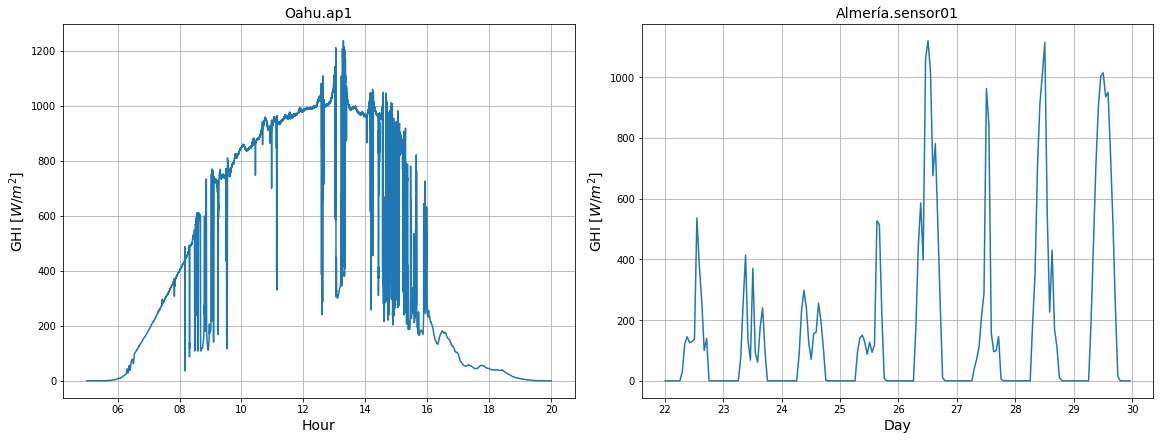

In [12]:
start_dts = [dt.datetime.strptime("2010-06-27 00:00:00", "%Y-%m-%d %H:%M:%S"), dt.datetime.strptime("2020-03-22 00:00:00", "%Y-%m-%d %H:%M:%S")]
stop_dts = [dt.datetime.strptime("2010-06-27 23:59:59", "%Y-%m-%d %H:%M:%S"), dt.datetime.strptime("2020-03-29 23:59:59", "%Y-%m-%d %H:%M:%S")]
"""
for f in range(len(farm_names)):
    farm_name = farm_names[f]
    output_path = output_paths[f]
    output_table = tb.open_file(output_path, 'r')
    fig,ax = plt.subplots(6,3, figsize=(15,20),constrained_layout = True)
    fig.suptitle(f'{farm_names_es[f]}: real values for each sensor', fontsize=16)
    for s in range(len(sensor_names[farm_name])):
        sensor_table = output_table.get_node(f'/DataCenter/{farm_name}/{sensor_names[farm_name][s]}')
        df = pd.DataFrame.from_records(sensor_table.read_where(f"(timestamp>={start_dts[f].timestamp()}) & (timestamp<{stop_dts[f].timestamp()})"))
        df['timestamp'] = [dt.datetime.fromtimestamp(x) for x in df['timestamp']]
        ax[s//3,s%3].set_title(sensor_names[farm_name][s])
        ax[s//3,s%3].plot(df.timestamp, df.radiation)
        if farm_name == 'Oahu':
            ax[s//3,s%3].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
        else:
            ax[s//3,s%3].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
        ax[s//3,s%3].grid()
        ax[s//3,s%3].set_ylabel('GHI $[W/m^2]$')
        if farm_name == 'Oahu':
            ax[s//3,s%3].set_xlabel('Hour') #, fontsize=12)
        else:
            ax[s//3,s%3].set_xlabel('Day') #, fontsize=12)
    fig.savefig(f'{farm_names[f]}-monitoring.png', dpi=400, bbox_inches='tight')
    output_table.close()
"""

s = 0
fig2,ax2 = plt.subplots(1, 2, figsize=(16,6),constrained_layout = True)
# fig2.suptitle(f'{farm_names_es[0]}.{sensor_names[farm_names[0]][s]} and {farm_names_es[1]}.{sensor_names[farm_names[1]][s]}: real values for two representative sensors', fontsize=16)
for f in range(len(farm_names)):
    farm_name = farm_names[f]
    output_path = output_paths[f]
    output_table = tb.open_file(output_path, 'r')
    sensor_table = output_table.get_node(f'/DataCenter/{farm_name}/{sensor_names[farm_name][s]}')
    df = pd.DataFrame.from_records(sensor_table.read_where(f"(timestamp>={start_dts[f].timestamp()}) & (timestamp<{stop_dts[f].timestamp()})"))
    df['timestamp'] = [dt.datetime.fromtimestamp(x) for x in df['timestamp']]
    ax2[f%2].set_title(f'{farm_names_es[f]}.{sensor_names[farm_names[f]][s]}', fontsize=14)
    ax2[f%2].plot(df.timestamp, df.radiation)
    if farm_name == 'Oahu':
        ax2[f%2].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    else:
        ax2[f%2].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
    ax2[f%2].grid()
    ax2[f%2].set_ylabel('GHI $[W/m^2]$', fontsize=14)
    if farm_name == 'Oahu':
        ax2[f%2].set_xlabel('Hour', fontsize=14)
    else:
        ax2[f%2].set_xlabel('Day', fontsize=14)
    output_table.close()
fig2.savefig('representative-monitoring.png', dpi=400, bbox_inches='tight')

## Prediction

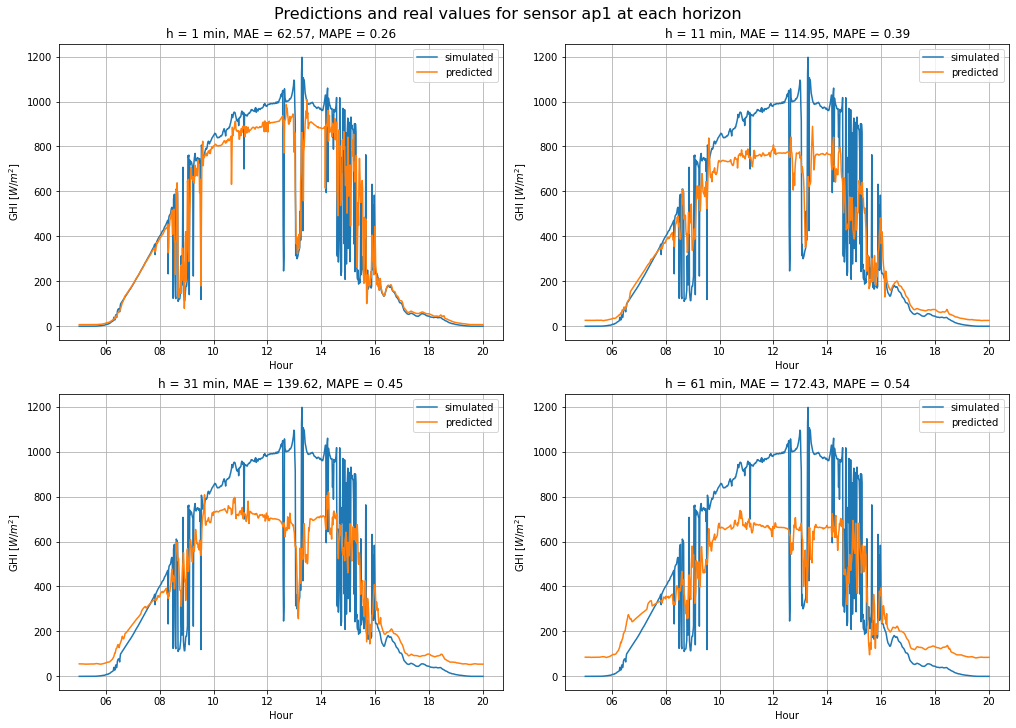

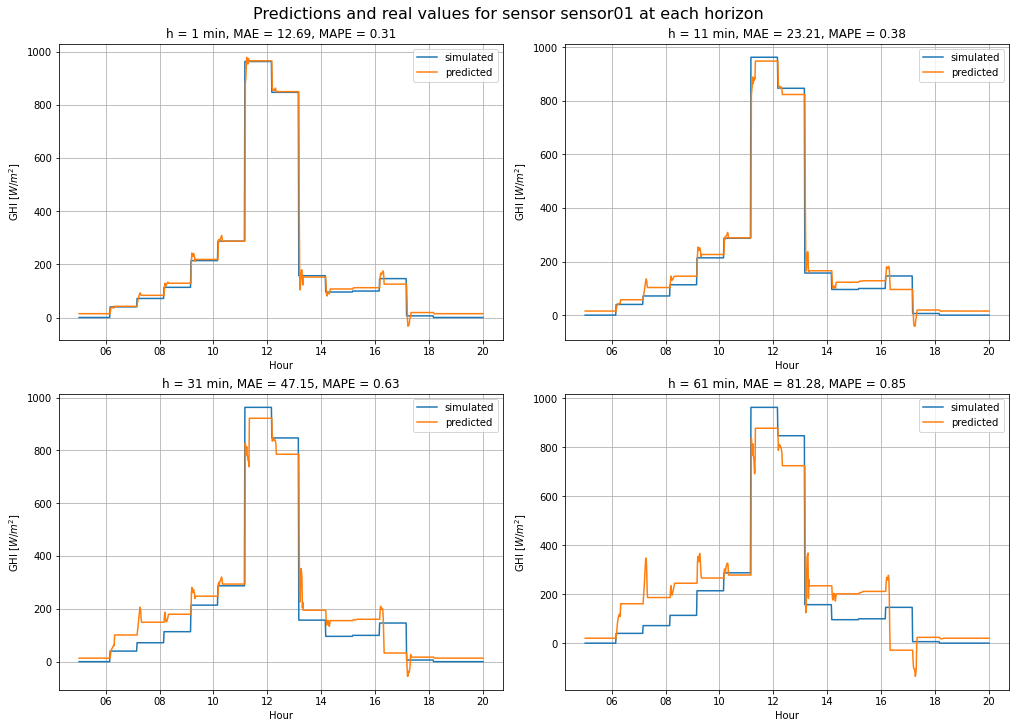

In [4]:
start_dts = [dt.datetime.strptime("2010-06-27 05:00:00", "%Y-%m-%d %H:%M:%S"), dt.datetime.strptime("2020-03-27 05:00:00", "%Y-%m-%d %H:%M:%S")]
stop_dts = [dt.datetime.strptime("2010-06-27 20:00:00", "%Y-%m-%d %H:%M:%S"), dt.datetime.strptime("2020-03-27 20:00:00", "%Y-%m-%d %H:%M:%S")]
for f in range(len(start_dts)):
    farm_name = farm_names[f]
    pred_dir = f'../data/output/DataCenter/{farm_name}'
    data_path = f'{pred_dir}/prediction-input.h5'
    prediction_path = f'{pred_dir}/prediction-output.h5'
    n_sensors = len(sensor_names[farm_name])
    n_horizons = 4
    n = stop_dts[f].strftime('%Y-%m-%d')
    with tb.open_file(prediction_path, 'r') as h5_preds, tb.open_file(data_path, 'r') as h5_data:
        timestamps = h5_preds.root.DataCenter[farm_name][n]._v_children.keys()
        timestamps = list(timestamps)
        preds = np.empty((len(timestamps), n_sensors, n_horizons))
        data = np.empty((len(timestamps), n_sensors))
        data_table = h5_data.get_node(f"/DataCenter/{farm_name}/{n}")
        data_idx = 0
        for idx, t in enumerate(timestamps):
            preds[idx] = h5_preds.root.DataCenter[farm_name][n][t][:]
            while data_idx < len(data_table) and data_table[data_idx][0] < dt.datetime.strptime(f'{n}  {t}', '%Y-%m-%d %H:%M:%S').timestamp():
                data_idx += 1
            data[idx] = h5_data.root.DataCenter[farm_name][n][data_idx,1:]
        sensors = h5_data.root.DataCenter[farm_name]._v_attrs['columns'][1:]
    times = [pd.to_datetime(d) for d in timestamps]
    # Print some statistics:
    # Sensor, horizon, MAE, MAPE
    mae = np.empty((n_sensors, n_horizons))
    mape = np.empty((n_sensors, n_horizons))
    for s in range(n_sensors):
        for h in range(n_horizons):
            mae[s][h] = metrics.mean_absolute_error(preds[:,s,h], data[:,s])
            mape[s][h] = metrics.mean_absolute_percentage_error(preds[:,s,h], data[:,s])
    # Plot predictions and real values for each sensor
    sensor = 0
    fig, ax = plt.subplots(2,2, figsize=(14,10),constrained_layout = True)
    fig.suptitle(f'Predictions and real values for sensor {sensor_names[farm_name][sensor]} at each horizon', fontsize=16)
    for idx,h in enumerate(['1 min','11 min','31 min','61 min']):
        ax[idx//2,idx%2].set_title(label=f'h = {h}, MAE = {mae[sensor,idx]:.2f}, MAPE = {mape[sensor,idx]:.2f}')
        ax[idx//2,idx%2].plot(times, data[:,sensor], label='simulated')
        ax[idx//2,idx%2].plot(times, preds[:,sensor,idx], label='predicted')
        ax[idx//2,idx%2].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
        ax[idx//2,idx%2].grid()
        ax[idx//2,idx%2].legend()
        ax[idx//2,idx%2].set_ylabel('GHI $[W/m^2]$')
        ax[idx//2,idx%2].set_xlabel('Hour') #, fontsize=12)
    plt.savefig(f'../data/output/DataCenter/{farm_name}/{farm_name}-predictions.png', dpi=400, bbox_inches='tight')


# Heat maps

In [19]:
start_dts = [dt.datetime.strptime("2010-06-01 00:00:00", "%Y-%m-%d %H:%M:%S"), dt.datetime.strptime("2020-06-01 00:00:00", "%Y-%m-%d %H:%M:%S")]
stop_dts = [dt.datetime.strptime("2010-07-01 00:00:00", "%Y-%m-%d %H:%M:%S"), dt.datetime.strptime("2020-07-01 00:00:00", "%Y-%m-%d %H:%M:%S")]
px.set_mapbox_access_token("pk.eyJ1IjoiamxyaXNjbyIsImEiOiJjbGpobnNtNnowZDF5M2ZsZmg0eHNxdTY3In0.Ny-C2RAKMu-LWO9O4X5hoQ")
for f in range(len(farm_names)):
    farm_name = farm_names[f]
    output_path = output_paths[f]
    output_table = tb.open_file(output_path, 'r')
    report_df = pd.DataFrame(columns=["latitude", "longitude", "radiation"])
    for s in range(len(sensor_names[farm_name])):
        sensor_table = output_table.get_node(f'/DataCenter/{farm_name}/{sensor_names[farm_name][s]}')
        df = pd.DataFrame.from_records(sensor_table.read_where(f"(timestamp>={start_dts[f].timestamp()}) & (timestamp<{stop_dts[f].timestamp()})"))
        df['timestamp'] = [dt.datetime.fromtimestamp(x) for x in df['timestamp']]
        report_df.loc[len(report_df)] = {"latitude": sensor_latitudes[farm_name][s], "longitude": sensor_longitudes[farm_name][s], "radiation": df['radiation'].mean()}

    fig = px.density_mapbox(report_df, lat='latitude', zoom=14, lon='longitude', z='radiation', mapbox_style="stamen-terrain")
    fig.write_html(f"{farm_name}-report3.html")
    fig.show()
    output_table.close()
    html_code = f'''
            <html>
                <head>
                    <title>Cloud Report</title>
                </head>
                <body>
                    <h1>Radiation map</h1>
                    <p>Et optio delectus at, nam porro unde perferendis sequi aliquid laudantium inventore illo fugit molestiae, suscipit nostrum temporibus amet. Fugit ipsum nisi eum tempora quod, sint minima voluptate? Suscipit quisquam ullam id et quod odio repellendus sint, at quam aut eligendi repellendus voluptates assumenda architecto incidunt eaque voluptas, tempora excepturi recusandae laboriosam ex ab distinctio reprehenderit voluptate error, laboriosam accusamus necessitatibus quae rerum sequi iusto et quibusdam odit ullam?.</p>
                    <p style="text-align:center;">
                        <iframe id="{farm_name}-report3" scrolling="no" style="border:none;" seamless="seamless" src="{farm_name}-report3.html" height="525" width="100%"></iframe>
                    </p>
                </body>
            </html>'''
    with open(f'{farm_name}_cloud_report.html', 'w') as f:
        f.write(html_code)